<a href="https://colab.research.google.com/github/miguel-fc/Algae-DL/blob/main/v1_VAE_algae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import cv2
from skimage.measure import label, regionprops, regionprops_table
from PIL import Image
import glob, os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
!ls P*

Padded.tar

Padded:
doublet  quad  single


In [5]:
!gunzip Padded.tar.gz

gzip: Padded.tar.gz: No such file or directory


In [6]:
!tar -xvf Padded.tar

Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Padded/doublet/._1501.png
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Padded/doublet/1501.png
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Padded/doublet/._1529.png
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
Padded/doublet/1529.png
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring u

In [7]:
!pwd

/content/drive/MyDrive


In [8]:
!rm Padded/single/._*
folder = '/content/drive/MyDrive/Padded/single'

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.png')]

total_single = []

for file in images:
  # print(file)
  image = cv2.imread(file) 
  total_single.append(image[np.newaxis,:,:,0]) 

print(len(total_single), total_single[0].shape)

single_c1 = np.vstack(total_single[i] for i in range(len(total_single)))  
print(single_c1.shape)    

1793 (1, 160, 160)
(1793, 160, 160)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [9]:
!rm Padded/doublet/._*
folder = '/content/drive/MyDrive/Padded/doublet'

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.png')]

total_doublet = []

for file in images:
  # print(file)
  image = cv2.imread(file) 
  total_doublet.append(image[np.newaxis,:,:,0]) 

print(len(total_doublet), total_doublet[0].shape)

doublet_c1 = np.vstack(total_doublet[i] for i in range(len(total_doublet)))  
print(doublet_c1.shape)    

1538 (1, 160, 160)
(1538, 160, 160)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [10]:
!rm Padded/quad/._*
folder = '/content/drive/MyDrive/Padded/quad'

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.png')]

total_quad = []

for file in images:
  # print(file)
  image = cv2.imread(file) 
  total_quad.append(image[np.newaxis,:,:,0]) 

print(len(total_quad), total_quad[0].shape)

quad_c1 = np.vstack(total_quad[i] for i in range(len(total_quad)))  
print(quad_c1.shape) 

1938 (1, 160, 160)
(1938, 160, 160)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


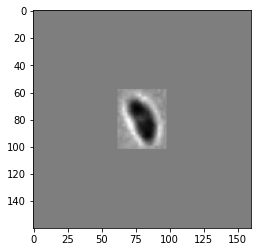

In [11]:
plt.imshow(single_c1[0],cmap='gray')

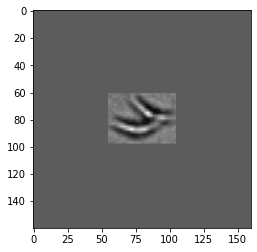

In [12]:
plt.imshow(doublet_c1[0],cmap='gray')

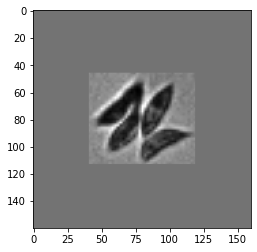

In [13]:
plt.imshow(quad_c1[0],cmap='gray')

In [14]:
subimg = np.vstack((single_c1,doublet_c1,quad_c1))

In [15]:
subimg.shape

(5269, 160, 160)

In [16]:
pip install atomai

     |████████████████████████████████| 146 kB 4.1 MB/s 
     |████████████████████████████████| 193 kB 43.1 MB/s 
     |████████████████████████████████| 310 kB 56.3 MB/s 
     |████████████████████████████████| 865 kB 82.1 MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509889 sha256=576d5a0be61a256cd648392de68634eb3d6874f16a54c1eff2ced66a2f45c654
  Stored in directory: /root/.cache/pip/wheels/66/b5/89/34c06ad393a6feb72b4cdde46d0f1c667f3e2632960f9df109
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174981 sha256=278cbdbcbc07334ec2b62995248f591a57d384f93349131c027171d29719e8a5
  Stored in directory: /root/.cache/pip/wheels/f4/4e/dd/06777c90710ce1766376ecc87979967fe69ff3affc29c0b530
Successfully built gpytorch mendeleev


In [17]:
import atomai as aoi

In [18]:
subimg.max(), subimg.min()

(255, 12)

In [19]:
subimg = (subimg - subimg.min())/(subimg.max() - subimg.min())

In [20]:
window_size = 160
in_dim = (window_size, window_size)

rvae = aoi.models.rVAE(in_dim, translation= True,
                       numlayers_encoder=3, numhidden_encoder=128,
                       numlayers_decoder=3, numhidden_decoder=128,
                       Skip = True)

rvae.fit(subimg, training_cycles =    50)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch: 1/50, Training loss: 122.8824
Epoch: 2/50, Training loss: 35.3855
Epoch: 3/50, Training loss: 34.7299
Epoch: 4/50, Training loss: 34.3770
Epoch: 5/50, Training loss: 34.0722
Epoch: 6/50, Training loss: 33.8550
Epoch: 7/50, Training loss: 33.7290
Epoch: 8/50, Training loss: 33.5403
Epoch: 9/50, Training loss: 33.3095
Epoch: 10/50, Training loss: 33.2067
Epoch: 11/50, Training loss: 32.9550
Epoch: 12/50, Training loss: 32.7958
Epoch: 13/50, Training loss: 32.6267
Epoch: 14/50, Training loss: 32.4326
Epoch: 15/50, Training loss: 32.2629
Epoch: 16/50, Training loss: 32.1249
Epoch: 17/50, Training loss: 31.9205
Epoch: 18/50, Training loss: 31.7921
Epoch: 19/50, Training loss: 31.7104
Epoch: 20/50, Training loss: 31.5899
Epoch: 21/50, Training loss: 31.4570
Epoch: 22/50, Training loss: 31.4669
Epoch: 23/50, Training loss: 31.3573
Epoch: 24/50, Training loss: 31.3614
Epoch: 25/50, Training loss: 31.3360
Epoch: 26/50, Training loss: 31.3198
Epoch: 27/50, Training loss: 31.2685
Epoch: 28

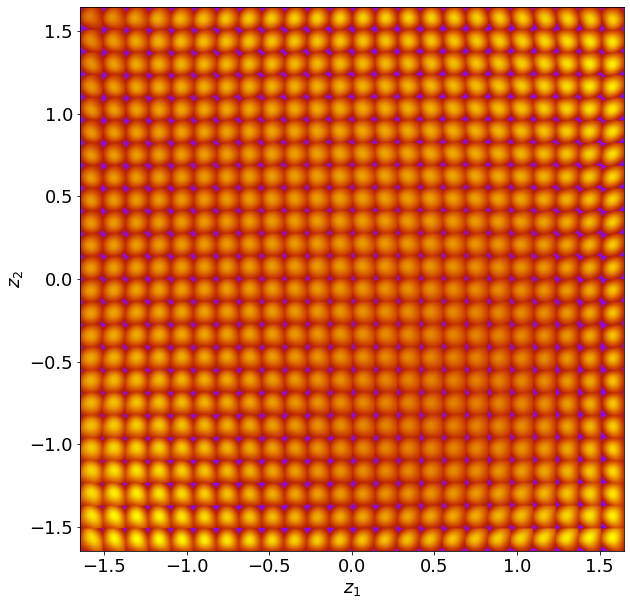

In [21]:
rvae.manifold2d(d=24);

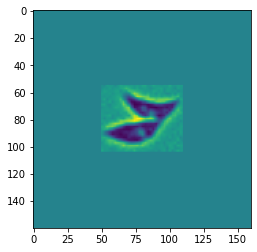

In [23]:
plt.imshow(subimg[3000])